# Identifying Ethnicity in OpenSAFELY-TPP
This short report describes how ethnicity can be identified in the OpenSAFELY-TPP database, and the strengths and weaknesses of the methods. This is a living document that will be updated to reflect changes to the OpenSAFELY-TPP database and the patient records within.

## OpenSAFELY
OpenSAFELY is an analytics platform for conducting analyses on Electronic Health Records inside the secure environment where the records are held. This has multiple benefits: 

* We don't transport large volumes of potentially disclosive pseudonymised patient data outside of the secure environments for analysis
* Analyses can run in near real-time as records are ready for analysis as soon as they appear in the secure environment
* All infrastructure and analysis code is stored in GitHub repositories, which are open for security review, scientific review, and re-use

A key feature of OpenSAFELY is the use of study definitions, which are formal specifications of the datasets to be generated from the OpenSAFELY database. This takes care of much of the complex EHR data wrangling required to create a dataset in an analysis-ready format. It also creates a library of standardised and validated variable definitions that can be deployed consistently across multiple projects. 

The purpose of this report is to describe all such variables that relate to BMI, their relative strengths and weaknesses, in what scenarios they are best deployed. It will also describe potential future definitions that have not yet been implemented.

## Available Records
OpenSAFELY-TPP runs inside TPP’s data centre which contains the primary care records for all patients registered at practices using TPP’s SystmOne Clinical Information System. This data centre also imports external datasets from other sources, including A&E attendances and hospital admissions from NHS Digital’s Secondary Use Service, and death registrations from the ONS. More information on available data sources can be found within the OpenSAFELY documentation. 

In [97]:
from IPython.display import display, Markdown
from lib import *

pd.set_option('display.max_rows', 500)
pd.options.mode.chained_assignment = None 


In [98]:
### CONFIGURE OPTIONS HERE ###

# Import file
input_path = '../output/data/input.feather'

# Definitions
definitions = ['ethnicity_5', 'ethnicity_new_5', 'ethnicity_primis_5']
other_vars = ['asian_count','black_count','mixed_count','other_count','white_count']

# Code dictionary
code_dict = {
    'imd': {0: 'Unknown', 100: '1 Most deprived', 200: '2', 300: '3', 400: '4', 500: '5 Least deprived'},
    'ethnicity_5': {1:'White', 2:'Mixed', 3:'Asian', 4:'Black', 5:'Other'},
    'ethnicity_new_5': {1:'White', 2:'Mixed', 3:'Asian', 4:'Black', 5:'Other'},
    'ethnicity_primis_5': {1:'White', 2:'Mixed', 3:'Asian', 4:'Black', 5:'Other'},
}

# Dates
dates = False
date_min = '2019-01-01'
date_max = '2019-12-31'
time_delta = 'M'

# Null value – 0 or NA
null = [0,"0"]

# Covariates
demographic_covariates = ['age_band', 'sex', 'region', 'imd']
clinical_covariates = ['dementia', 'diabetes', 'hypertension', 'learning_disability']

In [99]:
df_clean = import_clean(input_path, definitions, other_vars, demographic_covariates, clinical_covariates, null, date_min, date_max, time_delta, code_dict, dates)

## Results

### Count of Patients

In [100]:
patient_counts(df_clean, definitions, demographic_covariates, clinical_covariates)

ethnicity_5 ethnicity_new_5  \
group               subgroup                                                
population          N                              1000.0          1000.0   
                    with records              750 (100.0)     750 (100.0)   
age_band            0-19                        80 (10.7)       85 (11.3)   
                    20-29                       90 (12.0)       85 (11.3)   
                    30-39                      120 (16.0)      115 (15.3)   
                    40-49                       90 (12.0)       95 (12.7)   
                    50-59                      100 (13.3)      100 (13.3)   
                    60-69                       85 (11.3)       85 (11.3)   
                    70-79                       90 (12.0)       90 (12.0)   
                    80+                        100 (13.3)       95 (12.7)   
sex                 F                          375 (50.0)      375 (50.0)   
                    M                          375 (50.0)      375 (50.0)   
region              East Midlands                45 (6.0)        40 (5.3)   
                    East of England              55 (7.3)        60 (8.0)   
                    London                      80 (10.7)       80 (10.7)   
                    North East                   45 (6.0)        45 (6.0)   
                    North West                   55 (7.3)        45 (6.0)   
                    South East                  95 (12.7)      105 (14.0)   
                    West Midlands                55 (7.3)        55 (7.3)   
                    Yorkshire and the Humber     55 (7.3)        50 (6.7)   
imd                 1 Most deprived            130 (17.3)      150 (20.0)   
                    2                          150 (20.0)      160 (21.3)   
                    3                          145 (19.3)      130 (17.3)   
                    4                          155 (20.7)      155 (20.7)   
                    5 Least deprived           170 (22.7)      155 (20.7)   
dementia            False                      745 (99.3)      740 (98.7)   
                    True                          5 (0.7)        10 (1.3)   
diabetes            False                      745 (99.3)      745 (99.3)   
                    True                          5 (0.7)         5 (0.7)   
hypertension        False                      745 (99.3)      740 (98.7)   
                    True                          5 (0.7)        10 (1.3)   
learning_disability False                      740 (98.7)      740 (98.7)   
                    True                         10 (1.3)        10 (1.3)   

                                             ethnicity_primis_5     all_filled  
group               subgroup                                                    
population          N                                    1000.0         1000.0  
                    with records                    740 (100.0)  425.0 (100.0)  
age_band            0-19                              75 (10.1)    45.0 (10.6)  
                    20-29                             90 (12.2)    50.0 (11.8)  
                    30-39                            110 (14.9)    65.0 (15.3)  
                    40-49                             95 (12.8)    50.0 (11.8)  
                    50-59                             85 (11.5)    55.0 (12.9)  
                    60-69                             90 (12.2)    50.0 (11.8)  
                    70-79                             90 (12.2)    55.0 (12.9)  
                    80+                              105 (14.2)    60.0 (14.1)  
sex                 F                                370 (50.0)   210.0 (49.4)  
                    M                                375 (50.7)   215.0 (50.6)  
region              East Midlands                      45 (6.1)     30.0 (7.1)  
                    East of England                    60 (8.1)     30.0 (7.1)  
                    London                            

### Count of Missings

In [101]:
patient_counts(df_clean, definitions, demographic_covariates, clinical_covariates, missing=True)

ethnicity_5 ethnicity_new_5  \
group               subgroup                                                  
population          N                                1000.0          1000.0   
                    missing records           250.0 (100.0)   250.0 (100.0)   
age_band            0-19                        30.0 (12.0)     25.0 (10.0)   
                    20-29                       30.0 (12.0)     35.0 (14.0)   
                    30-39                       35.0 (14.0)     35.0 (14.0)   
                    40-49                       40.0 (16.0)     35.0 (14.0)   
                    50-59                       25.0 (10.0)     30.0 (12.0)   
                    60-69                       30.0 (12.0)     30.0 (12.0)   
                    70-79                       30.0 (12.0)     30.0 (12.0)   
                    80+                         30.0 (12.0)     35.0 (14.0)   
sex                 F                          130.0 (52.0)    130.0 (52.0)   
                    M                          120.0 (48.0)    120.0 (48.0)   
region              East Midlands                10.0 (4.0)      15.0 (6.0)   
                    East of England              20.0 (8.0)      20.0 (8.0)   
                    London                      35.0 (14.0)     35.0 (14.0)   
                    North East                   15.0 (6.0)      15.0 (6.0)   
                    North West                   15.0 (6.0)     25.0 (10.0)   
                    South East                  45.0 (18.0)     30.0 (12.0)   
                    West Midlands                15.0 (6.0)      20.0 (8.0)   
                    Yorkshire and the Humber     10.0 (4.0)      15.0 (6.0)   
imd                 1 Most deprived             55.0 (22.0)     40.0 (16.0)   
                    2                           55.0 (22.0)     45.0 (18.0)   
                    3                           45.0 (18.0)     60.0 (24.0)   
                    4                           55.0 (22.0)     55.0 (22.0)   
                    5 Least deprived            40.0 (16.0)     55.0 (22.0)   
dementia            False                      245.0 (98.0)   250.0 (100.0)   
                    True                              - (-)           - (-)   
diabetes            False                      245.0 (98.0)    245.0 (98.0)   
                    True                              - (-)           - (-)   
hypertension        False                      245.0 (98.0)   250.0 (100.0)   
                    True                              - (-)           - (-)   
learning_disability False                     250.0 (100.0)   250.0 (100.0)   
                    True                              - (-)           - (-)   

                                             ethnicity_primis_5   all_missing  
group               subgroup                                                   
population          N                                    1000.0        1000.0  
                    missing records               260.0 (100.0)  15.0 (100.0)  
age_band            0-19                            35.0 (13.5)         - (-)  
                    20-29                           30.0 (11.5)         - (-)  
                    30-39                           45.0 (17.3)         - (-)  
                    40-49                           35.0 (13.5)         - (-)  
                    50-59                           40.0 (15.4)         - (-)  
                    60-69                            20.0 (7.7)         - (-)  
                    70-79                           30.0 (11.5)         - (-)  
                    80+                             30.0 (11.5)         - (-)  
sex                 F                              140.0 (53.8)   10.0 (66.7)  
                    M                              120.0 (46.2)         - (-)  
region              East Midlands                    10.0 (3.8)         - (-)  
                    East of England                  15.0 (5.8)         - (-)  
  

### Count by Category

In [102]:
patient_counts(df_clean, definitions, demographic_covariates, clinical_covariates, categories=True)

ethnicity_5_Asian  \
group               subgroup                                     
population          with records                 170.0 (100.0)   
age_band            0-19                           20.0 (11.8)   
                    20-29                          20.0 (11.8)   
                    30-39                          30.0 (17.6)   
                    40-49                          20.0 (11.8)   
                    50-59                          25.0 (14.7)   
                    60-69                          20.0 (11.8)   
                    70-79                          20.0 (11.8)   
                    80+                            20.0 (11.8)   
sex                 F                              90.0 (52.9)   
                    M                              80.0 (47.1)   
region              East Midlands                   15.0 (8.8)   
                    East of England                 15.0 (8.8)   
                    London                          15.0 (8.8)   
                    North East                      10.0 (5.9)   
                    North West                     20.0 (11.8)   
                    South East                     20.0 (11.8)   
                    West Midlands                   10.0 (5.9)   
                    Yorkshire and the Humber        10.0 (5.9)   
imd                 1 Most deprived                30.0 (17.6)   
                    2                              30.0 (17.6)   
                    3                              30.0 (17.6)   
                    4                              30.0 (17.6)   
                    5 Least deprived               50.0 (29.4)   
dementia            False                        170.0 (100.0)   
                    True                                 - (-)   
diabetes            False                        170.0 (100.0)   
                    True                                 - (-)   
hypertension        False                        170.0 (100.0)   
                    True                                 - (-)   
learning_disability False                        170.0 (100.0)   
                    True                                 - (-)   

                                             ethnicity_5_Black  \
group               subgroup                                     
population          with records                 165.0 (100.0)   
age_band            0-19                            10.0 (6.1)   
                    20-29                           15.0 (9.1)   
                    30-39                          25.0 (15.2)   
                    40-49                          25.0 (15.2)   
                    50-59                          30.0 (18.2)   
                    60-69                          20.0 (12.1)   
                    70-79                          20.0 (12.1)   
                    80+                            25.0 (15.2)   
sex                 F                              90.0 (54.5)   
                    M                              75.0 (45.5)   
region              East Midlands                   10.0 (6.1)   
                    East of England                 10.0 (6.1)   
                    London                         20.0 (12.1)   
                    North East                      10.0 (6.1)   
                    North West                      10.0 (6.1)   
                    South East                     20.0 (12.1)   
                    West Midlands                   10.0 (6.1)   
                    Yorkshire and the Humber        15.0 (9.1)   
imd                 1 Most deprived                30.0 (18.2)   
                    2                              25.0 (15.2)   
                    3                              40.0 (24.2)   
                    4                              35.0 (21.2)   
                    5 Least deprived               35.0 (21.2)   
dementia            False                         160.0 (97.0)   
                  

### Overlapping Definitions
Idea: Use an upset plot

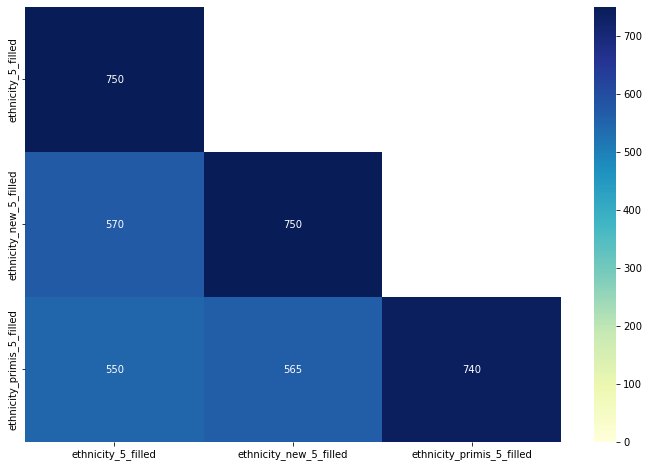

In [103]:
display_heatmap(df_clean, definitions)

### Latest vs. Most Common

In [104]:
latest_common_comparison(df_clean, definitions, other_vars)

,matching (n=245.0),not_matching (n=995.0)
ethnicity_5,,
Asian,35.0,255.0
Black,35.0,220.0
Mixed,35.0,190.0
Other,35.0,220.0
White,105.0,110.0


,asian_count (n=155.0),black_count (n=165.0),mixed_count (n=170.0),other_count (n=155.0),white_count (n=595.0)
ethnicity_5,,,,,
Asian,35.0,40.0,35.0,40.0,140.0
Black,30.0,35.0,35.0,30.0,125.0
Mixed,30.0,25.0,35.0,25.0,110.0
Other,35.0,35.0,35.0,35.0,115.0
White,25.0,30.0,30.0,25.0,105.0


,matching (n=270.0),not_matching (n=970.0)
ethnicity_new_5,,
Asian,35.0,195.0
Black,40.0,255.0
Mixed,35.0,210.0
Other,30.0,200.0
White,130.0,110.0


,asian_count (n=160.0),black_count (n=170.0),mixed_count (n=165.0),other_count (n=160.0),white_count (n=585.0)
ethnicity_new_5,,,,,
Asian,35.0,30.0,30.0,30.0,105.0
Black,45.0,40.0,40.0,40.0,130.0
Mixed,30.0,35.0,35.0,30.0,115.0
Other,30.0,35.0,30.0,30.0,105.0
White,20.0,30.0,30.0,30.0,130.0


,matching (n=295.0),not_matching (n=935.0)
ethnicity_primis_5,,
Asian,10.0,110.0
Black,30.0,170.0
Mixed,50.0,320.0
Other,25.0,165.0
White,180.0,170.0


,asian_count (n=165.0),black_count (n=165.0),mixed_count (n=165.0),other_count (n=160.0),white_count (n=575.0)
ethnicity_primis_5,,,,,
Asian,10.0,15.0,15.0,20.0,60.0
Black,30.0,30.0,30.0,30.0,80.0
Mixed,55.0,50.0,50.0,45.0,170.0
Other,25.0,30.0,25.0,25.0,85.0
White,45.0,40.0,45.0,40.0,180.0


### State Change

In [105]:
state_change(df_clean, definitions, other_vars)

,asian_count,black_count,mixed_count,other_count,white_count
ethnicity_5,,,,,
Asian (n = 170),-,20.0,15.0,20.0,135.0
Black (n = 165),15.0,-,20.0,15.0,125.0
Mixed (n = 135),15.0,10.0,-,10.0,105.0
Other (n = 150),10.0,15.0,15.0,-,110.0
White (n = 130),10.0,10.0,15.0,5.0,-


,asian_count,black_count,mixed_count,other_count,white_count
ethnicity_new_5,,,,,
Asian (n = 140),-,20.0,10.0,10.0,110.0
Black (n = 165),20.0,-,20.0,15.0,125.0
Mixed (n = 140),15.0,15.0,-,10.0,105.0
Other (n = 140),15.0,15.0,15.0,-,105.0
White (n = 165),10.0,20.0,20.0,20.0,-


,asian_count,black_count,mixed_count,other_count,white_count
ethnicity_primis_5,,,,,
Asian (n = 85),-,15.0,5.0,15.0,65.0
Black (n = 105),15.0,-,10.0,10.0,75.0
Mixed (n = 215),25.0,20.0,-,15.0,160.0
Other (n = 105),10.0,10.0,10.0,-,80.0
White (n = 230),25.0,25.0,25.0,20.0,-


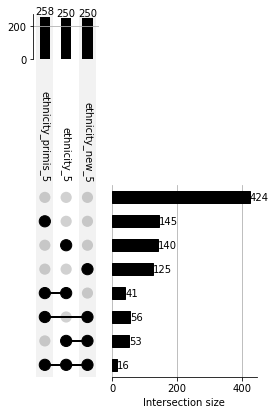

In [106]:
upsetplot(df_clean,definitions,pd.isna,'vertical')
